In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import ipywidgets as widgets

pd.set_option("display.max_rows", 1000)

exp_path = Path("../experiments/issue_32/")
tex_path = exp_path / "tex_files_openbmi"
tex_path.mkdir(exist_ok=True)

In [2]:
!ls /home/paulo/Documents/GIT/BCI_MsC/experiments/issue_32/results_openbmi/

1   13	17  20	24  28	34  38	41  45	49  52	7	       results_cat.csv
10  14	18  21	25  29	35  39	42  46	5   53	8	       results.csv
11  15	19  22	26  3	36  4	43  47	50  54	9	       results_more.csv
12  16	2   23	27  30	37  40	44  48	51  6	results_2.csv  results_pc.csv


In [3]:
df = pd.read_csv("/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_32/results_openbmi/results_cat.csv")
uids = df.uid.unique()

full_df = df[~df.algorithm.isin(["pca", "whitening"])]
# full_df = pd.read_csv("/home/paulo/Documents/GIT/BCI_MsC/experiments/issue_19/results.csv")

In [4]:
full_df.run.unique(), full_df.uid.unique(), full_df.uid.nunique()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
        25, 26, 27, 28, 29,  3,  9,  8,  7,  6, 54, 52, 51, 50,  5, 49, 48,
        47, 46, 45, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4, 40, 41, 42,
        43, 44, 53]),
 54)

In [5]:
full_df.algorithm.unique(), full_df.classifier.unique()

(array(['None', 'ORICA (0)', 'ORICA (1)', 'Ext. Infomax', 'Infomax',
        'SOBI', 'JADE', 'Picard', 'FastICA', 'picard_o'], dtype=object),
 array(['mlp', 'random_forest', 'extra_trees', 'gaussian_nb', 'lda',
        'svm_sigmoid', 'svm_poly', 'svm_linear', 'svm_rbf', 'logistic_l2',
        'logistic_l1', 'logistic'], dtype=object))

In [6]:
def get_default(get_fn):
    def fn(key):
        return get_fn(key, key)
    return fn

classifier_rename_dict = dict(
    mlp="MLP",
    random_forest="Random Forest",
    extra_trees="Extra Trees",
    gaussian_nb="Naïve Bayes",
    lda="LDA",
    svm_sigmoid="SVM (Sig.)",
    svm_poly="SVM (Poly)",
    svm_linear="SVM (Lin.)",
    svm_rbf="SVM (RBF)",
    logistic_l1="Log. Reg. (L1)",
    logistic_l2="Log. Reg. (L2)",
    logistic="Log. Reg.",
)
algorithm_rename_dict = dict(
    picard_o="Picard-O",
)
full_df["algorithm"] = full_df.algorithm.apply(get_default(algorithm_rename_dict.get))
full_df["classifier"] = full_df.classifier.apply(get_default(classifier_rename_dict.get)) 

In [7]:
full_df.algorithm.unique(), full_df.classifier.unique()

(array(['None', 'ORICA (0)', 'ORICA (1)', 'Ext. Infomax', 'Infomax',
        'SOBI', 'JADE', 'Picard', 'FastICA', 'Picard-O'], dtype=object),
 array(['MLP', 'Random Forest', 'Extra Trees', 'Naïve Bayes', 'LDA',
        'SVM (Sig.)', 'SVM (Poly)', 'SVM (Lin.)', 'SVM (RBF)',
        'Log. Reg. (L2)', 'Log. Reg. (L1)', 'Log. Reg.'], dtype=object))

In [8]:
# full_df.to_csv("formatted_ob.csv", index=None)
# !rm -rf ../experiments/issue_32/plots_openbmi
# !python ../ica_benchmark/visualization/multiple_runs.py -path ./formatted_ob.csv -save_folder ../experiments/issue_32/plots_openbmi

In [9]:
print(full_df.shape)
subset = set(full_df.columns) - set(["run"])
# full_df = full_df.drop_duplicates(subset=subset)
print(full_df.shape)
full_df.columns

(64800, 11)
(64800, 11)


Index(['run', 'algorithm', 'classifier', 'uid', 'Acc.', 'Bal. Acc.', 'Kappa',
       'clf_fit_time', 'preprocess_fit_time', 'selected_features',
       'duplicated'],
      dtype='object')

In [10]:
df = full_df.groupby(["uid", "classifier", "algorithm"], as_index=False).mean()

# Best combination

In [11]:
sorted_all = full_df.groupby(["uid", "classifier", "algorithm"], as_index=False).agg([np.mean, np.std]).reset_index()#[["uid", "Kappa"]]
sorted_all["order"] = sorted_all.groupby("uid").rank(ascending=False)[("Kappa", "mean")]
sorted_all
ranked_df_list = list()
for uid in sorted_all.uid.unique():
    uid_df = sorted_all[sorted_all.uid == uid]
    max_rank = uid_df.order.min()
    r_df = uid_df[uid_df.order == max_rank][["uid", "classifier", "algorithm", "Kappa"]].round(3)
    ranked_df_list.append(r_df)
ranked_df = pd.concat(ranked_df_list).sort_values(by=["uid", ("Kappa", "std")], ascending=[True, True])
ranked_df

/tmp/ipykernel_110217/2299690975.py:1: FutureWarning: ['selected_features'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  sorted_all = full_df.groupby(["uid", "classifier", "algorithm"], as_index=False).agg([np.mean, np.std]).reset_index()#[["uid", "Kappa"]]
/tmp/ipykernel_110217/2299690975.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  sorted_all["order"] = sorted_all.groupby("uid").rank(ascending=False)[("Kappa", "mean")]


uid      classifier     algorithm  Kappa       
                                         mean    std
40     1  Log. Reg. (L2)  Ext. Infomax  0.385  0.034
154    2  Log. Reg. (L1)          None  0.220  0.000
164    2  Log. Reg. (L2)          None  0.220  0.000
224    2       SVM (RBF)          None  0.220  0.000
271    3  Log. Reg. (L1)       FastICA  0.718  0.158
426    4     Naïve Bayes     ORICA (1)  0.190  0.000
534    5             MLP          None  0.482  0.024
627    6       Log. Reg.        Picard  0.634  0.041
628    6       Log. Reg.      Picard-O  0.634  0.041
742    7       Log. Reg.       Infomax  0.300  0.095
924    8      SVM (Lin.)          None  0.100  0.000
1014   9             MLP          None  0.383  0.059
1184  10       SVM (RBF)          None  0.150  0.000
1286  11      SVM (Lin.)     ORICA (1)  0.070  0.000
1296  11      SVM (Poly)     ORICA (1)  0.070  0.000
1419  12      SVM (Poly)          SOBI  0.180  0.000
1544  13       SVM (RBF)          None  0.170  0.000
1646  14      SVM (Lin.)     ORICA (1)  0.160  0.000
1666  14       SVM (RBF)     ORICA (1)  0.160  0.000
1745  15     Naïve Bayes     ORICA (0)  0.100  0.000
1815  16             LDA     ORICA (0)  0.250  0.000
1991  17   Random Forest       FastICA  0.291  0.057
2139  18      SVM (Poly)          SOBI  0.600  0.000
2279  19      SVM (Sig.)          SOBI  0.340  0.000
2289  20     Extra Trees          SOBI  0.133  0.042
2430  21  Log. Reg. (L1)  Ext. Infomax  0.954  0.020
2639  22      SVM (Sig.)          SOBI  0.450  0.000
2662  23       Log. Reg.       Infomax  0.333  0.063
2875  24      SVM (Sig.)     ORICA (0)  0.090  0.000
2904  25       Log. Reg.          None  0.340  0.000
3006  26     Extra Trees     ORICA (1)  0.110  0.071
3219  27      SVM (Poly)          SOBI  0.150  0.000
3279  28  Log. Reg. (L1)          SOBI  0.760  0.000
3384  29       Log. Reg.          None  0.970  0.000
3404  29  Log. Reg. (L2)          None  0.970  0.000
3444  29      SVM (Lin.)          None  0.970  0.000
3534  30             MLP          None  0.198  0.029
3700  31       SVM (RBF)  Ext. Infomax  0.111  0.075
3799  32   Random Forest          SOBI  0.751  0.029
3939  33      SVM (Poly)          SOBI  0.850  0.000
4066  34       SVM (RBF)     ORICA (1)  0.150  0.000
4130  35             MLP  Ext. Infomax  0.371  0.218
4220  36       Log. Reg.  Ext. Infomax  0.951  0.007
4260  36     Naïve Bayes  Ext. Infomax  0.951  0.010
4404  37      SVM (Lin.)          None  0.840  0.000
4506  38     Naïve Bayes     ORICA (1)  0.090  0.000
4612  39             MLP       Infomax  0.476  0.127
4796  40      SVM (Sig.)     ORICA (1)  0.100  0.000
4817  41             LDA        Picard  0.063  0.043
4818  41             LDA      Picard-O  0.063  0.043
4991  42   Random Forest       FastICA  0.173  0.077
5119  43   Random Forest          SOBI  0.311  0.014
5189  44       Log. Reg.          SOBI  0.960  0.000
5352  45   Random Forest       Infomax  0.804  0.030
5429  46       Log. Reg.          SOBI  0.450  0.000
5449  46  Log. Reg. (L2)          SOBI  0.450  0.000
5624  47       SVM (RBF)          None  0.110  0.000
5719  48   Random Forest          SOBI  0.198  0.085
5874  49      SVM (Sig.)          None  0.340  0.000
5975  50      SVM (Poly)     ORICA (0)  0.140  0.000
6111  51      SVM (Sig.)       FastICA  0.283  0.024
6189  52     Naïve Bayes          SOBI  0.330  0.000
6304  53     Naïve Bayes          None  0.100  0.000
6344  53       SVM (RBF)          None  0.100  0.000
6455  54      SVM (Poly)     ORICA (0)  0.180  0.000

In [12]:
import numpy as np

algs, counts = np.unique(ranked_df.drop_duplicates(subset=("uid", "")).classifier, return_counts=True)
algs, counts = np.unique(ranked_df.classifier, return_counts=True)
pd.DataFrame(dict(ICA=algs, count=counts)).sort_values(by="count", ascending=False)

,ICA,count
2,Log. Reg.,9
10,SVM (RBF),8
9,SVM (Poly),7
6,Naïve Bayes,6
7,Random Forest,6
11,SVM (Sig.),6
5,MLP,5
8,SVM (Lin.),5
3,Log. Reg. (L1),4
4,Log. Reg. (L2),4


In [13]:
ranked_df.to_latex(tex_path / "best_combination.tex", index=False)

/tmp/ipykernel_110217/4233368133.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  ranked_df.to_latex(tex_path / "best_combination.tex", index=False)


# Best ICA's

In [14]:
sorted_alg = df.groupby(["uid", "algorithm"], as_index=False).agg([np.mean, np.std]).Kappa.sort_values(by=["uid", "mean"]).reset_index()
sorted_alg["order"] = sorted_alg.groupby("uid").rank(ascending=False)["mean"]
sorted_alg

/tmp/ipykernel_110217/2109070944.py:1: FutureWarning: ['classifier'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  sorted_alg = df.groupby(["uid", "algorithm"], as_index=False).agg([np.mean, np.std]).Kappa.sort_values(by=["uid", "mean"]).reset_index()


,uid,algorithm,mean,std,order
0,1,ORICA (0),-0.080833,0.031389,10.0
1,1,JADE,0.013750,0.022547,9.0
2,1,ORICA (1),0.022500,0.025816,8.0
3,1,None,0.177667,0.061614,7.0
4,1,Picard,0.252500,0.011572,5.5
5,1,Picard-O,0.252500,0.011572,5.5
6,1,SOBI,0.256417,0.041903,4.0
7,1,Infomax,0.257750,0.011733,3.0
8,1,FastICA,0.276500,0.015067,2.0
9,1,Ext. Infomax,0.364750,0.017131,1.0


In [15]:
ranked_df_list = list()
for uid in sorted_alg.uid.unique():
    uid_df = sorted_alg.query("uid == @uid")
    max_rank = uid_df.order.min()
    r_df = uid_df.query("order == @max_rank")[["uid", "algorithm", "mean", "std"]].round(3)
    ranked_df_list.append(r_df)
ranked_df = pd.concat(ranked_df_list).sort_values(by="uid")
ranked_df

,uid,algorithm,mean,std
9,1,Ext. Infomax,0.365,0.017
19,2,None,0.169,0.050
29,3,None,0.640,0.035
39,4,ORICA (0),0.119,0.019
49,5,None,0.395,0.118
58,6,Picard,0.596,0.031
59,6,Picard-O,0.596,0.031
69,7,Infomax,0.267,0.035
79,8,None,0.043,0.030
89,9,None,0.332,0.069


In [16]:
(
    full_df
    .groupby(["uid", "algorithm", "classifier"], as_index=False).mean()
    .groupby(["uid", "algorithm"], as_index=False)
    .agg([np.mean, np.std])
    .Kappa.sort_values(by=["uid", "mean"], ascending=False).reset_index()
#     .sort_values(by=["algorithm", "mean"], ascending=False)
    .drop_duplicates(subset="uid", keep="first")
    .sort_values(by=["algorithm", "mean"])
#     .query("mean > .5")
    .groupby("algorithm")
    .agg(["count", "mean", "std"])
    .sort_values(by=("uid", "count"), ascending=False)
    .loc[:, [("uid", "count"), ("mean", "mean"), ("mean", "std"), ("std", "mean"), ("std", "std")]]
)

/tmp/ipykernel_110217/1481547862.py:2: FutureWarning: ['classifier'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  full_df


uid      mean                 std          
             count      mean       std      mean       std
algorithm                                                 
None            15  0.260872  0.243575  0.054585  0.024826
SOBI            11  0.405871  0.327470  0.062236  0.040917
Ext. Infomax     5  0.380467  0.293399  0.033551  0.017492
Picard           5  0.293467  0.354818  0.023962  0.008644
FastICA          4  0.223333  0.119482  0.040431  0.026289
Infomax          4  0.561271  0.338602  0.049389  0.019929
ORICA (0)        4  0.152396  0.055468  0.034126  0.010785
ORICA (1)        4  0.089167  0.030400  0.035621  0.006624
JADE             2  0.028917  0.039834  0.015119  0.012293

In [17]:
(
    full_df
    .groupby(["uid", "algorithm", "classifier"], as_index=False).mean()
    .groupby(["uid", "algorithm"], as_index=False)
    .agg([np.mean, np.std])
    .Kappa.sort_values(by=["uid", "mean"], ascending=False).reset_index()
#     .sort_values(by=["algorithm", "mean"], ascending=False)
    .drop_duplicates(subset="uid", keep="first")
    .sort_values(by=["algorithm", "mean"])
    .query("mean > .5")
    .groupby("algorithm")
    .agg(["count", "mean", "std"])
    .sort_values(by=("uid", "count"), ascending=False)
    .loc[:, [("uid", "count"), ("mean", "mean"), ("mean", "std"), ("std", "mean"), ("std", "std")]]
)

/tmp/ipykernel_110217/3240088694.py:2: FutureWarning: ['classifier'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  full_df


uid      mean                 std          
             count      mean       std      mean       std
algorithm                                                 
SOBI             5  0.708233  0.144797  0.069404  0.045252
Infomax          2  0.848083  0.121622  0.052555  0.029931
None             2  0.785708  0.206063  0.042739  0.010526
Picard           2  0.677000  0.115141  0.030854  0.000665
Ext. Infomax     1  0.873167       NaN  0.035099       NaN

In [18]:
(
    full_df
    .groupby(["uid", "algorithm", "classifier"], as_index=False).mean()
    .groupby(["uid", "classifier"], as_index=False)
    .agg([np.mean, np.std])
    .Kappa.sort_values(by=["uid", "mean"], ascending=False).reset_index()
    .drop_duplicates(subset="uid", keep="first")
    .groupby("classifier")
    .agg(["count", "mean", "std"])
    .sort_values(by=("uid", "count"), ascending=False)
    .loc[:, [("uid", "count"), ("mean", "mean"), ("mean", "std"), ("std", "mean"), ("std", "std")]]
)

/tmp/ipykernel_110217/1096224276.py:2: FutureWarning: ['algorithm'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  full_df


uid      mean                 std          
               count      mean       std      mean       std
classifier                                                  
Random Forest     14  0.164164  0.154166  0.122454  0.096906
SVM (Lin.)         8  0.076787  0.068607  0.077437  0.047046
SVM (Poly)         6  0.011717  0.010798  0.040911  0.015992
Naïve Bayes        5  0.209200  0.336988  0.104446  0.094268
Log. Reg. (L1)     4  0.579575  0.178649  0.223835  0.121380
Extra Trees        3  0.217133  0.307643  0.089260  0.050357
LDA                3  0.272500  0.297892  0.158130  0.102980
Log. Reg.          3  0.472133  0.322364  0.136679  0.075064
SVM (RBF)          3  0.075233  0.107851  0.043934  0.026487
Log. Reg. (L2)     2  0.422350  0.314450  0.288227  0.220931
MLP                2  0.161250  0.069084  0.128678  0.001515
SVM (Sig.)         1  0.117100       NaN  0.128853       NaN

In [19]:
(
    full_df
    .groupby(["uid", "algorithm", "classifier"], as_index=False).mean()
    .groupby(["uid", "classifier"], as_index=False)
    .agg([np.mean, np.std])
    .Kappa.sort_values(by=["uid", "mean"], ascending=False).reset_index()
    .drop_duplicates(subset="uid", keep="first")
    .query("mean > .5")
    .groupby("classifier")
    .agg(["count", "mean", "std"])
    .sort_values(by=("uid", "count"), ascending=False)
    .loc[:, [("uid", "count"), ("mean", "mean"), ("mean", "std"), ("std", "mean"), ("std", "std")]]
)

/tmp/ipykernel_110217/2623090798.py:2: FutureWarning: ['algorithm'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  full_df


uid      mean                 std          
               count      mean       std      mean       std
classifier                                                  
Log. Reg. (L1)     3  0.637633  0.166278  0.183427  0.110917
Extra Trees        1  0.572200       NaN  0.145652       NaN
LDA                1  0.601000       NaN  0.276409       NaN
Log. Reg.          1  0.830700       NaN  0.076813       NaN
Log. Reg. (L2)     1  0.644700       NaN  0.444449       NaN
Naïve Bayes        1  0.802300       NaN  0.255639       NaN
Random Forest      1  0.547100       NaN  0.361071       NaN

In [20]:
(
    full_df
    .groupby(["uid", "algorithm", "classifier"], as_index=False)
    .agg([np.mean, np.std])
    .Kappa.sort_values(by=["uid", "mean"], ascending=False).reset_index()
    .drop_duplicates(subset="uid", keep="first")
#     .query("mean > .5")
    .groupby(["algorithm", "classifier"])
    .agg(["count", "mean", "std"])
    .sort_values(by=("uid", "count"), ascending=False)
    .loc[:, [("uid", "count"), ("mean", "mean"), ("mean", "std"), ("std", "mean"), ("std", "std")]]
)

/tmp/ipykernel_110217/986690679.py:2: FutureWarning: ['selected_features'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  full_df


uid      mean                 std          
                            count      mean       std      mean       std
algorithm    classifier                                                  
SOBI         SVM (Poly)         4  0.445000  0.339264  0.000000  0.000000
             Random Forest      3  0.420000  0.292169  0.042809  0.037312
None         SVM (RBF)          3  0.143333  0.030551  0.000000  0.000000
             MLP                3  0.354333  0.144154  0.037524  0.019021
SOBI         SVM (Sig.)         2  0.395000  0.077782  0.000000  0.000000
None         Log. Reg.          2  0.655000  0.445477  0.000000  0.000000
ORICA (1)    Naïve Bayes        2  0.140000  0.070711  0.000000  0.000000
             SVM (Lin.)         2  0.115000  0.063640  0.000000  0.000000
None         SVM (Lin.)         2  0.470000  0.523259  0.000000  0.000000
ORICA (0)    SVM (Poly)         2  0.160000  0.028284  0.000000  0.000000
Infomax      Log. Reg.          2  0.316500  0.023335  0.078915  0.022396
SOBI         Log. Reg.          2  0.705000  0.360624  0.000000  0.000000
FastICA      Random Forest      2  0.232000  0.083439  0.067236  0.013859
ORICA (1)    Extra Trees        1  0.110000       NaN  0.070868       NaN
SOBI         Extra Trees        1  0.133000       NaN  0.042439       NaN
Picard       LDA                1  0.063000       NaN  0.043474       NaN
ORICA (1)    SVM (Sig.)         1  0.100000       NaN  0.000000       NaN
             SVM (RBF)          1  0.150000       NaN  0.000000       NaN
SOBI         Log. Reg. (L1)     1  0.760000       NaN  0.000000       NaN
             Naïve Bayes        1  0.330000       NaN  0.000000       NaN
Picard       Log. Reg.          1  0.634000       NaN  0.040607       NaN
Ext. Infomax Log. Reg.          1  0.951000       NaN  0.007379       NaN
ORICA (0)    SVM (Sig.)         1  0.090000       NaN  0.000000       NaN
             Naïve Bayes        1  0.100000       NaN  0.000000       NaN
Ext. Infomax Log. Reg. (L1)     1  0.954000       NaN  0.020111       NaN
None         SVM (Sig.)         1  0.340000       NaN  0.000000       NaN
             Naïve Bayes        1  0.100000       NaN  0.000000       NaN
             Log. Reg. (L1)     1  0.220000       NaN  0.000000       NaN
Infomax      Random Forest      1  0.804000       NaN  0.029515       NaN
             MLP                1  0.476000       NaN  0.126596       NaN
FastICA      SVM (Sig.)         1  0.283000       NaN  0.023594       NaN
             Log. Reg. (L1)     1  0.718000       NaN  0.157607       NaN
Ext. Infomax SVM (RBF)          1  0.111000       NaN  0.075048       NaN
             MLP                1  0.371000       NaN  0.218299       NaN
             Log. Reg. (L2)     1  0.385000       NaN  0.034400       NaN
ORICA (0)    LDA                1  0.250000       NaN  0.000000       NaN

In [21]:
(
    full_df
    .groupby(["uid", "algorithm", "classifier"], as_index=False)
    .agg([np.mean, np.std])
    .Kappa.sort_values(by=["uid", "mean"], ascending=False).reset_index()
    .groupby(["algorithm", "classifier"])
    .agg(["count", "mean", "std"])
    .sort_values(by=("mean", "mean"), ascending=False)
    .loc[:, [("uid", "count"), ("mean", "mean"), ("mean", "std"), ("std", "mean"), ("std", "std")]]
    .reset_index()
    .drop_duplicates(subset=[("classifier", "")], keep="first")
    .sort_values(by=("mean", "mean"), ascending=False)
    .round(3)
)

/tmp/ipykernel_110217/2891091555.py:2: FutureWarning: ['selected_features'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  full_df


algorithm      classifier   uid   mean           std       
                                 count   mean    std   mean    std
0        Infomax       Log. Reg.    54  0.238  0.295  0.074  0.045
1        Infomax  Log. Reg. (L1)    54  0.238  0.291  0.074  0.043
4        Infomax   Random Forest    54  0.238  0.291  0.062  0.028
10  Ext. Infomax      SVM (Lin.)    54  0.236  0.288  0.073  0.058
12       Infomax             MLP    54  0.235  0.289  0.075  0.043
13  Ext. Infomax  Log. Reg. (L2)    54  0.234  0.289  0.072  0.059
30       Infomax     Extra Trees    54  0.227  0.290  0.067  0.035
31  Ext. Infomax      SVM (Sig.)    54  0.226  0.284  0.080  0.059
37  Ext. Infomax       SVM (RBF)    54  0.224  0.283  0.083  0.060
42  Ext. Infomax             LDA    54  0.220  0.270  0.074  0.061
53       Infomax      SVM (Poly)    54  0.209  0.272  0.081  0.048
74       FastICA     Naïve Bayes    54  0.189  0.266  0.079  0.062

In [22]:
ranked_df.to_latex(tex_path / "best_alg.tex", index=False)

/tmp/ipykernel_110217/1770953152.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  ranked_df.to_latex(tex_path / "best_alg.tex", index=False)


In [23]:
order_df = sorted_alg.groupby("algorithm").median()[["order"]].sort_values(by="order")
order_df

,order
algorithm,
Ext. Infomax,4.5
Picard,4.5
Picard-O,4.5
FastICA,5.0
Infomax,5.0
None,6.0
SOBI,6.0
ORICA (0),8.0
JADE,8.5


In [24]:
order_df.to_latex(tex_path / "best_alg_median_rank.tex", index=False)

/tmp/ipykernel_110217/2213213182.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  order_df.to_latex(tex_path / "best_alg_median_rank.tex", index=False)


In [25]:
(
    full_df
    .groupby(["algorithm", "uid"], as_index=False)
    .mean()
    .groupby(["algorithm"], as_index=False)
    .agg(["median", "mean", "std"])
    .Kappa
    .sort_values(by=["mean"], ascending=False)
)


,median,mean,std
algorithm,,,
Ext. Infomax,0.088875,0.224985,0.280889
Infomax,0.098333,0.224162,0.280329
Picard,0.110375,0.221867,0.278785
Picard-O,0.110375,0.221867,0.278785
FastICA,0.116792,0.221461,0.281026
SOBI,0.063417,0.202465,0.285812
None,0.094375,0.194156,0.257124
ORICA (0),0.021375,0.086662,0.213671
ORICA (1),0.016375,0.067515,0.189966


# Best classifier

In [26]:
sorted_clf = df.groupby(["uid", "classifier"], as_index=False).agg([np.mean, np.std]).Kappa.sort_values(by=["uid", "mean"]).reset_index()
sorted_clf["order"] = sorted_clf.groupby("uid").rank(ascending=False)["mean"]
ranked_df_list = list()
for uid in sorted_clf.uid.unique():
    uid_df = sorted_clf.query("uid == @uid")
    max_rank = uid_df.order.min()
    r_df = uid_df.query("order == @max_rank")[["uid", "classifier", "mean", "std"]].round(3)
    ranked_df_list.append(r_df)
ranked_df = pd.concat(ranked_df_list).sort_values(by="uid")
ranked_df

/tmp/ipykernel_110217/3632222478.py:1: FutureWarning: ['algorithm'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  sorted_clf = df.groupby(["uid", "classifier"], as_index=False).agg([np.mean, np.std]).Kappa.sort_values(by=["uid", "mean"]).reset_index()


,uid,classifier,mean,std
11,1,SVM (Lin.),0.193,0.137
23,2,SVM (Lin.),0.095,0.098
35,3,Extra Trees,0.572,0.146
47,4,Random Forest,0.088,0.043
58,5,LDA,0.197,0.110
59,5,Log. Reg.,0.197,0.117
71,6,Log. Reg. (L1),0.520,0.125
83,7,Naïve Bayes,0.165,0.137
95,8,SVM (Lin.),0.010,0.041
107,9,Random Forest,0.206,0.167


In [27]:
ranked_df.to_latex(tex_path / "best_clf.tex", index=False)

/tmp/ipykernel_110217/3553676854.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  ranked_df.to_latex(tex_path / "best_clf.tex", index=False)


In [28]:
order_df = sorted_clf.groupby("classifier").median()[["order"]].sort_values(by="order")
order_df

,order
classifier,
Log. Reg. (L1),4.0
Log. Reg.,5.0
Log. Reg. (L2),5.0
SVM (Lin.),5.0
Random Forest,6.0
SVM (Sig.),6.5
LDA,7.0
MLP,7.0
Extra Trees,8.0


In [29]:
order_df.to_latex(tex_path / "best_clf_median_rank.tex", index=False)

/tmp/ipykernel_110217/4039510481.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  order_df.to_latex(tex_path / "best_clf_median_rank.tex", index=False)


In [30]:
save_folder = Path("../experiments/issue_32/plots_openbmi/")

classifiers = full_df.classifier.unique()
tab_contents = classifiers
children = list()
for clf in classifiers:
    with open(save_folder / f"best_algorithm_per_subject_for_{clf}.png", "rb") as f:
        widget = widgets.Image(
            value=f.read(),
            format='png',
        )
    children.append(widget)

tab = widgets.Tab()
tab.children = children
for i, clf in enumerate(classifiers):
    tab.set_title(i, clf)
tab

In [31]:
algorithms = full_df.algorithm.unique()
tab_contents = algorithms
children = list()
for alg in algorithms:
    with open(save_folder / f"best_classifier_per_subject_for_{alg}.png", "rb") as f:
        widget = widgets.Image(
            value=f.read(),
            format='png',
        )
    children.append(widget)

tab = widgets.Tab()
tab.children = children
for i, clf in enumerate(algorithms):
    tab.set_title(i, alg)
tab

In [32]:
classifiers = full_df.classifier.unique()
tab_contents = classifiers
children = list()
for clf in classifiers:
    with open(save_folder / f"average_per_algorithm_for_{clf}.png", "rb") as f:
        widget = widgets.Image(
            value=f.read(),
            format='png',
        )
    children.append(widget)

tab = widgets.Tab()
tab.children = children
for i, clf in enumerate(classifiers):
    tab.set_title(i, clf)
tab

In [33]:
algorithms = full_df.algorithm.unique()
tab_contents = algorithms
children = list()
for alg in algorithms:
    with open(save_folder / f"average_per_classifier_for_{alg}.png", "rb") as f:
        widget = widgets.Image(
            value=f.read(),
            format='png',
        )
    children.append(widget)

tab = widgets.Tab()
tab.children = children
for i, alg in enumerate(algorithms):
    tab.set_title(i, alg)
tab

In [34]:
classifiers = full_df.classifier.unique()
tab_contents = classifiers
children = list()
for clf in classifiers:
    with open(save_folder / f"detailed_{clf}.png", "rb") as f:
        widget = widgets.Image(
            value=f.read(),
            format='png',
        )
    children.append(widget)

tab = widgets.Tab()
tab.children = children
for i, clf in enumerate(classifiers):
    tab.set_title(i, clf)
tab

In [35]:
algorithms = full_df.algorithm.unique()
tab_contents = algorithms
children = list()
for alg in algorithms:
    with open(save_folder / f"detailed_{alg}.png", "rb") as f:
        widget = widgets.Image(
            value=f.read(),
            format='png',
        )
    children.append(widget)

tab = widgets.Tab()
tab.children = children
for i, clf in enumerate(algorithms):
    tab.set_title(i, clf)
tab

In [36]:
(
    full_df
    .groupby(["algorithm", "classifier", "uid"], as_index=False).mean()
    .groupby(["algorithm"], as_index=False).agg(["median", "mean", "std"])
    .Kappa
    .sort_values(by="mean", ascending=False)
)


/tmp/ipykernel_110217/2599224063.py:2: FutureWarning: ['classifier'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  full_df


,median,mean,std
algorithm,,,
Ext. Infomax,0.0880,0.224985,0.280994
Infomax,0.0940,0.224162,0.280603
Picard,0.0985,0.221867,0.279153
Picard-O,0.0985,0.221867,0.279153
FastICA,0.1050,0.221461,0.281124
SOBI,0.0700,0.202465,0.288776
None,0.0900,0.194156,0.260949
ORICA (0),0.0200,0.086662,0.214856
ORICA (1),0.0200,0.067515,0.191370


In [37]:
adf = (
    full_df
    .groupby(["algorithm", "classifier", "uid"], as_index=False).mean()
    .groupby(["algorithm", "classifier"], as_index=False).mean()
    .groupby(["algorithm"], as_index=False).agg(["median", "mean", "std"])
    .Kappa
    .sort_values(by="mean", ascending=False)
    .reset_index()
)
display(adf)
adf.to_latex(tex_path / "best_algorithm.tex", index=False)

/tmp/ipykernel_110217/2366751454.py:2: FutureWarning: ['classifier'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  full_df


,algorithm,median,mean,std
0,Ext. Infomax,0.229269,0.224985,0.014767
1,Infomax,0.230213,0.224162,0.015361
2,Picard,0.226102,0.221867,0.015702
3,Picard-O,0.226102,0.221867,0.015702
4,FastICA,0.225204,0.221461,0.014469
5,SOBI,0.203546,0.202465,0.016807
6,None,0.205926,0.194156,0.021772
7,ORICA (0),0.086824,0.086662,0.005530
8,ORICA (1),0.068676,0.067515,0.006192
9,JADE,0.061083,0.058693,0.006078


/tmp/ipykernel_110217/2366751454.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  adf.to_latex(tex_path / "best_algorithm.tex", index=False)


In [39]:
from scipy.stats import bootstrap, wilcoxon

def upper_ci(arr):
    return bootstrap((arr, ), np.mean, n_resamples=1000).confidence_interval.high

def low_ci(arr):
    return bootstrap((arr, ), np.mean, n_resamples=1000).confidence_interval.low


adf = (
    full_df
    .groupby(["algorithm", "classifier", "uid"], as_index=False).mean()
    .groupby(["algorithm", "classifier"], as_index=False).agg(["median", "mean", "std", low_ci, upper_ci])
    .reset_index()
    .sort_values(by=[("Kappa", "mean"), ("Kappa", "std")], ascending=[False, False])
    .drop_duplicates(subset=[("classifier", '')])
    .loc[:, ["classifier", "algorithm", "Kappa"]]
    .sort_values(by=[("Kappa", "mean"), ("Kappa", "std")], ascending=[False, False])
    .assign(
        CI=lambda df: df.apply(
            lambda row: "[{:.3f},{:.3f}]".format(
                row.Kappa.low_ci, row.Kappa.upper_ci
            ),
            axis=1
        )
    )
    .round(3)
    .loc[:, [("classifier", ""), ("algorithm", ""), ("Kappa", "median"), ("Kappa", "mean"), ("Kappa", "std")]]
    .rename(columns=dict(CI="CI (95%)"))
)
display(adf)

adf.to_latex(tex_path / "best_alg_per_clf_overall.tex", index=False)
adf = (
    full_df
    .groupby(["algorithm", "classifier", "uid"], as_index=False).mean()
    .groupby(["algorithm", "classifier"], as_index=False).agg(["median", "mean", "std", low_ci, upper_ci])
    .reset_index()
    .sort_values(by=[("Kappa", "mean"), ("Kappa", "std")], ascending=[False, False])
    .drop_duplicates(subset=[("algorithm", '')])
    .loc[:, ["algorithm", "classifier", "Kappa"]]
    .sort_values(by=[("Kappa", "mean"), ("Kappa", "std")], ascending=[False, False])
    .assign(
        CI=lambda df: df.apply(
            lambda row: "[{:.3f},{:.3f}]".format(
                row.Kappa.low_ci, row.Kappa.upper_ci
            ),
            axis=1
        )
    )
    .round(3)
#     .loc[:, [("algorithm", ""), ("classifier", ""), ("Kappa", "median"), ("Kappa", "mean"), ("CI", "")]]
    .loc[:, [("algorithm", ""), ("classifier", ""), ("Kappa", "median"), ("Kappa", "mean"), ("Kappa", "std")]]
    .rename(columns=dict(CI="CI (95%)"))
)
display(adf)
adf.to_latex(tex_path / "best_clf_per_alg_overall.tex", index=False)

/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/_resampling.py:144: RuntimeWarning: invalid value encountered in double_scalars
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/_resampling.py:97: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/_resampling.py:144: RuntimeWarning: invalid value encountered in double_scalars
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/_resampling.py:97: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))


classifier     algorithm  Kappa              
                                 median   mean    std
26       Log. Reg.       Infomax  0.108  0.238  0.295
27  Log. Reg. (L1)       Infomax  0.104  0.238  0.291
31   Random Forest       Infomax  0.135  0.238  0.291
8       SVM (Lin.)  Ext. Infomax  0.088  0.236  0.288
29             MLP       Infomax  0.088  0.235  0.289
4   Log. Reg. (L2)  Ext. Infomax  0.094  0.234  0.289
24     Extra Trees       Infomax  0.096  0.227  0.290
11      SVM (Sig.)  Ext. Infomax  0.099  0.226  0.284
10       SVM (RBF)  Ext. Infomax  0.075  0.224  0.283
1              LDA  Ext. Infomax  0.081  0.220  0.270
33      SVM (Poly)       Infomax  0.070  0.209  0.272
18     Naïve Bayes       FastICA  0.061  0.189  0.266

/tmp/ipykernel_110217/1643193384.py:33: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  adf.to_latex(tex_path / "best_alg_per_clf_overall.tex", index=False)
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/_resampling.py:144: RuntimeWarning: invalid value encountered in double_scalars
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/_resampling.py:97: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/_resampling.

algorithm      classifier  Kappa              
                                  median   mean    std
26        Infomax       Log. Reg.  0.108  0.238  0.295
87         Picard  Log. Reg. (L1)  0.106  0.238  0.292
99       Picard-O  Log. Reg. (L1)  0.106  0.238  0.292
3    Ext. Infomax  Log. Reg. (L1)  0.091  0.238  0.292
15        FastICA  Log. Reg. (L1)  0.136  0.237  0.294
115          SOBI   Random Forest  0.091  0.231  0.294
51           None  Log. Reg. (L1)  0.085  0.209  0.278
71      ORICA (0)      SVM (Sig.)  0.040  0.095  0.224
79      ORICA (1)   Random Forest  0.036  0.077  0.195
41           JADE             MLP  0.013  0.064  0.149

/tmp/ipykernel_110217/1643193384.py:57: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  adf.to_latex(tex_path / "best_clf_per_alg_overall.tex", index=False)


In [71]:
from itertools import product
from scipy.stats import median_test

l_df = (
    full_df
    .query("algorithm == 'FastICA'")
    .query("classifier == 'Log. Reg. (L1)'")
)
algs = full_df.algorithm.unique()
clfs = full_df.classifier.unique()
clfs = ["Log. Reg."]

for alg, clf in product(algs, clfs):
    r_df = (
        full_df
        .query(f"algorithm == '{alg}'")
        .query(f"classifier == '{clf}'")
    )
    mdf = l_df.merge(
        r_df,
        on=["uid", "run"],
        suffixes=("_l", "_r")
    )
    print(alg, median_test(mdf.Kappa_l, mdf.Kappa_r).pvalue)

None 0.2475571693262177
ORICA (0) 3.584285644553743e-10
ORICA (1) 1.5227275489780604e-17
Ext. Infomax 0.9514639364099934
Infomax 0.7150001873404894
SOBI 2.597677129255097e-06
JADE 7.080541176204888e-21
Picard 0.8076676549441323
FastICA 1.0
Picard-O 0.8076676549441323


In [67]:
mdf

,run,algorithm_l,classifier_l,uid,Acc._l,Bal. Acc._l,Kappa_l,clf_fit_time_l,preprocess_fit_time_l,selected_features_l,duplicated_l,algorithm_r,classifier_r,Acc._r,Bal. Acc._r,Kappa_r,clf_fit_time_r,preprocess_fit_time_r,selected_features_r,duplicated_r
0,0,FastICA,Log. Reg. (L1),1,0.685,0.685,0.37,0.046947,6.288290,"{'C': 14.38449888287663, 'fit_intercept': True...",0,FastICA,Log. Reg. (L1),0.685,0.685,0.37,0.046947,6.288290,"{'C': 14.38449888287663, 'fit_intercept': True...",0
1,1,FastICA,Log. Reg. (L1),1,0.695,0.695,0.39,0.045162,8.914228,"{'C': 2.3357214690901213, 'fit_intercept': Tru...",0,FastICA,Log. Reg. (L1),0.695,0.695,0.39,0.045162,8.914228,"{'C': 2.3357214690901213, 'fit_intercept': Tru...",0
2,2,FastICA,Log. Reg. (L1),1,0.675,0.675,0.35,0.045435,5.175170,"{'C': 0.37926901907322497, 'fit_intercept': Tr...",0,FastICA,Log. Reg. (L1),0.675,0.675,0.35,0.045435,5.175170,"{'C': 0.37926901907322497, 'fit_intercept': Tr...",0
3,3,FastICA,Log. Reg. (L1),1,0.535,0.535,0.07,0.044108,9.132649,"{'C': 1.2742749857031335, 'fit_intercept': Tru...",0,FastICA,Log. Reg. (L1),0.535,0.535,0.07,0.044108,9.132649,"{'C': 1.2742749857031335, 'fit_intercept': Tru...",0
4,4,FastICA,Log. Reg. (L1),1,0.585,0.585,0.17,0.043912,8.862535,"{'C': 4.281332398719392, 'fit_intercept': True...",0,FastICA,Log. Reg. (L1),0.585,0.585,0.17,0.043912,8.862535,"{'C': 4.281332398719392, 'fit_intercept': True...",0
5,5,FastICA,Log. Reg. (L1),1,0.610,0.610,0.22,0.045900,6.273834,"{'C': 4.281332398719392, 'fit_intercept': True...",0,FastICA,Log. Reg. (L1),0.610,0.610,0.22,0.045900,6.273834,"{'C': 4.281332398719392, 'fit_intercept': True...",0
6,6,FastICA,Log. Reg. (L1),1,0.650,0.650,0.30,0.047550,10.028184,"{'C': 14.38449888287663, 'fit_intercept': True...",0,FastICA,Log. Reg. (L1),0.650,0.650,0.30,0.047550,10.028184,"{'C': 14.38449888287663, 'fit_intercept': True...",0
7,7,FastICA,Log. Reg. (L1),1,0.710,0.710,0.42,0.044680,6.509044,"{'C': 0.6951927961775606, 'fit_intercept': Tru...",0,FastICA,Log. Reg. (L1),0.710,0.710,0.42,0.044680,6.509044,"{'C': 0.6951927961775606, 'fit_intercept': Tru...",0
8,8,FastICA,Log. Reg. (L1),1,0.655,0.655,0.31,0.045034,5.124296,"{'C': 0.6951927961775606, 'fit_intercept': Tru...",0,FastICA,Log. Reg. (L1),0.655,0.655,0.31,0.045034,5.124296,"{'C': 0.6951927961775606, 'fit_intercept': Tru...",0
9,9,FastICA,Log. Reg. (L1),1,0.670,0.670,0.34,0.043803,7.396571,"{'C': 4.281332398719392, 'fit_intercept': True...",0,FastICA,Log. Reg. (L1),0.670,0.670,0.34,0.043803,7.396571,"{'C': 4.281332398719392, 'fit_intercept': True...",0


In [33]:
adf = (
    full_df
    .groupby(["algorithm", "classifier", "uid"], as_index=False).mean()
    .groupby(["algorithm", "classifier"], as_index=False).agg(["median", "mean", "std", low_ci, upper_ci])
    .reset_index()
    .sort_values(by=[("Kappa", "mean"), ("Kappa", "std")], ascending=[False, False])
    .drop_duplicates(subset=[("algorithm", '')])
    .loc[:, ["algorithm", "classifier", "Kappa"]]
    .sort_values(by=[("Kappa", "mean"), ("Kappa", "std")], ascending=[False, False])
    .assign(
        CI=lambda df: df.apply(
            lambda row: "[{:.3f},{:.3f}]".format(
                row.Kappa.low_ci, row.Kappa.upper_ci
            ),
            axis=1
        )
    )
    .round(3)
#     .loc[:, [("algorithm", ""), ("classifier", ""), ("Kappa", "median"), ("Kappa", "mean"), ("CI", "")]]
    .loc[:, [("algorithm", ""), ("classifier", ""), ("Kappa", "median"), ("Kappa", "mean"), ("Kappa", "std")]]
    .rename(columns=dict(CI="CI (95%)"))
)
cols = ["algorithm", "classifier"]
df = full_df.merge(adf[cols].iloc[4:6], on=cols, how="inner")
cols = ["algorithm", "classifier", "run"]

df = df.query("algorithm == 'FastICA'")[cols + ["Kappa", "uid"]].merge(df.query("algorithm == 'SOBI'")[cols + ["Kappa", "uid"]], on=["uid", "run"])

from scipy.stats import wilcoxon

wilcoxon(
    df.Kappa_x,
    df.Kappa_y,
#     alternative="greater",
    zero_method="zsplit",
).pvalue

/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/_bootstrap.py:119: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = num / den
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/_bootstrap.py:93: BootstrapDegenerateDistributionWarning: The bootstrap distribution is degenerate; the confidence interval is not defined.
  warnings.warn(BootstrapDegenerateDistributionWarning())
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/_bootstrap.py:119: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = num / den
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/_bootstrap.py:93: BootstrapDegenerateDistributionWarning: The bootstrap distribution is degenerate; the confidence interval is not defined.
  warnings.warn(BootstrapDegenerateDistributionWarning())
/tmp/ipykernel_16785/1983677475.py:24: FutureWarning: merging between different levels is deprecated and will be removed

0.29609733860475473

In [34]:
adf = (
    full_df
    .groupby(["algorithm", "classifier", "uid"], as_index=False).mean()
    .groupby(["algorithm", "classifier"], as_index=False).agg(["median", "mean", "std", low_ci, upper_ci])
    .reset_index()
    .sort_values(by=[("Kappa", "mean"), ("Kappa", "std")], ascending=[False, False])
    .round(3)
    .loc[:, [("algorithm", ""), ("classifier", ""), ("Kappa", "median"), ("Kappa", "mean"), ("Kappa", "std")]]
    .rename(columns=dict(CI="CI (95%)"))
    .head(10)
)
adf.to_latex(tex_path / "top_10_comb.tex", index=False)
adf

/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/_bootstrap.py:119: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = num / den
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/_bootstrap.py:93: BootstrapDegenerateDistributionWarning: The bootstrap distribution is degenerate; the confidence interval is not defined.
  warnings.warn(BootstrapDegenerateDistributionWarning())
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/_bootstrap.py:119: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = num / den
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/_bootstrap.py:93: BootstrapDegenerateDistributionWarning: The bootstrap distribution is degenerate; the confidence interval is not defined.
  warnings.warn(BootstrapDegenerateDistributionWarning())
/tmp/ipykernel_16785/471635020.py:12: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the 

algorithm      classifier  Kappa              
                                 median   mean    std
26       Infomax       Log. Reg.  0.108  0.238  0.295
27       Infomax  Log. Reg. (L1)  0.104  0.238  0.291
87        Picard  Log. Reg. (L1)  0.106  0.238  0.292
99      Picard-O  Log. Reg. (L1)  0.106  0.238  0.292
31       Infomax   Random Forest  0.135  0.238  0.291
3   Ext. Infomax  Log. Reg. (L1)  0.091  0.238  0.292
2   Ext. Infomax       Log. Reg.  0.093  0.237  0.291
86        Picard       Log. Reg.  0.110  0.237  0.290
98      Picard-O       Log. Reg.  0.110  0.237  0.290
15       FastICA  Log. Reg. (L1)  0.136  0.237  0.294

In [35]:
from scipy.stats import bootstrap, wilcoxon

def upper_ci(arr):
    return bootstrap((arr, ), np.mean, n_resamples=1000).confidence_interval.high

def low_ci(arr):
    return bootstrap((arr, ), np.mean, n_resamples=1000).confidence_interval.low


adf = (
    full_df
    .groupby(["algorithm", "classifier", "uid"], as_index=False).mean()
    .groupby(["algorithm", "classifier"], as_index=False).mean()
    .groupby(["algorithm"], as_index=False).agg(["median", "mean", "std", low_ci, upper_ci])
    .reset_index()
    .loc[:, ["algorithm", "Kappa"]]
    .sort_values(by=[("Kappa", "mean"), ("Kappa", "std")], ascending=[False, False])
    .assign(
        CI=lambda df: df.apply(
            lambda row: "[{:.3f},{:.3f}]".format(
                row.Kappa.low_ci, row.Kappa.upper_ci
            ),
            axis=1
        )
    )
    .round(3)
    .loc[:, [("algorithm", ""), ("Kappa", "median"), ("Kappa", "mean"), ("Kappa", "std")]]
    .rename(columns=dict(CI="CI (95%)"))
)
display(adf)
adf.to_latex(tex_path / "alg_results.tex", index=False)


adf = (
    full_df
    .groupby(["classifier", "algorithm", "uid"], as_index=False).mean()
    .groupby(["classifier", "algorithm"], as_index=False).mean()
    .groupby(["classifier"], as_index=False).agg(["median", "mean", "std", low_ci, upper_ci])
    .reset_index()
    .loc[:, ["classifier", "Kappa"]]
    .sort_values(by=[("Kappa", "mean"), ("Kappa", "std")], ascending=[False, False])
    .assign(
        CI=lambda df: df.apply(
            lambda row: "[{:.3f},{:.3f}]".format(
                row.Kappa.low_ci, row.Kappa.upper_ci
            ),
            axis=1
        )
    )
    .round(3)
    .loc[:, [("classifier", ""), ("Kappa", "median"), ("Kappa", "mean"), ("Kappa", "std")]]
    .rename(columns=dict(CI="CI (95%)"))
)
display(adf)
adf.to_latex(tex_path / "clf_results.tex", index=False)


/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/_bootstrap.py:119: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = num / den
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/_bootstrap.py:93: BootstrapDegenerateDistributionWarning: The bootstrap distribution is degenerate; the confidence interval is not defined.
  warnings.warn(BootstrapDegenerateDistributionWarning())
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/_bootstrap.py:119: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = num / den
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/_bootstrap.py:93: BootstrapDegenerateDistributionWarning: The bootstrap distribution is degenerate; the confidence interval is not defined.
  warnings.warn(BootstrapDegenerateDistributionWarning())
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/_bootstrap.py:125: RuntimeWarning: invalid value

algorithm  Kappa              
                median   mean    std
0  Ext. Infomax  0.229  0.225  0.015
2       Infomax  0.230  0.224  0.015
7        Picard  0.226  0.222  0.016
8      Picard-O  0.226  0.222  0.016
1       FastICA  0.225  0.221  0.014
9          SOBI  0.204  0.202  0.017
4          None  0.206  0.194  0.022
5     ORICA (0)  0.087  0.087  0.006
6     ORICA (1)  0.069  0.068  0.006
3          JADE  0.061  0.059  0.006

/tmp/ipykernel_16785/1850257346.py:31: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  adf.to_latex(tex_path / "alg_results.tex", index=False)
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/_bootstrap.py:119: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = num / den
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/_bootstrap.py:93: BootstrapDegenerateDistributionWarning: The bootstrap distribution is degenerate; the confidence interval is not defined.
  warnings.warn(BootstrapDegenerateDistributionWarning())
/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/scipy/stats/_bootstrap.py:119: RuntimeWarning: invalid value encountered in scalar divide
  a_hat 

classifier  Kappa              
                   median   mean    std
3   Log. Reg. (L1)  0.223  0.183  0.077
2        Log. Reg.  0.221  0.182  0.076
7    Random Forest  0.232  0.180  0.077
4   Log. Reg. (L2)  0.220  0.180  0.075
8       SVM (Lin.)  0.218  0.179  0.074
5              MLP  0.215  0.177  0.073
0      Extra Trees  0.221  0.175  0.071
11      SVM (Sig.)  0.214  0.174  0.070
1              LDA  0.211  0.168  0.072
10       SVM (RBF)  0.208  0.167  0.071
9       SVM (Poly)  0.201  0.161  0.066
6      Naïve Bayes  0.171  0.144  0.053

/tmp/ipykernel_16785/1850257346.py:55: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  adf.to_latex(tex_path / "clf_results.tex", index=False)


In [36]:
(
    full_df
    .groupby(["algorithm", "classifier", "uid"], as_index=False).mean()
    .sort_values(by=["uid", "Kappa"], ascending=[True, False])
    .drop_duplicates(subset=["uid"])
    .groupby(["algorithm", "classifier"], as_index=False).agg(["count", "mean", list])
    .loc[:, [("uid", "count"), ("uid", "list"), ("Kappa", "mean")]] #, ("Kappa", "list")]]
    .sort_values(by=("uid", "count"), ascending=False)
    .head()
)

uid                       Kappa
                        count              list      mean
algorithm classifier                                     
SOBI      SVM (Poly)        4  [12, 18, 27, 33]  0.445000
          Random Forest     3      [32, 43, 48]  0.420000
None      SVM (RBF)         3      [10, 13, 47]  0.143333
          MLP               3        [5, 9, 30]  0.354333
SOBI      SVM (Sig.)        2          [19, 22]  0.395000

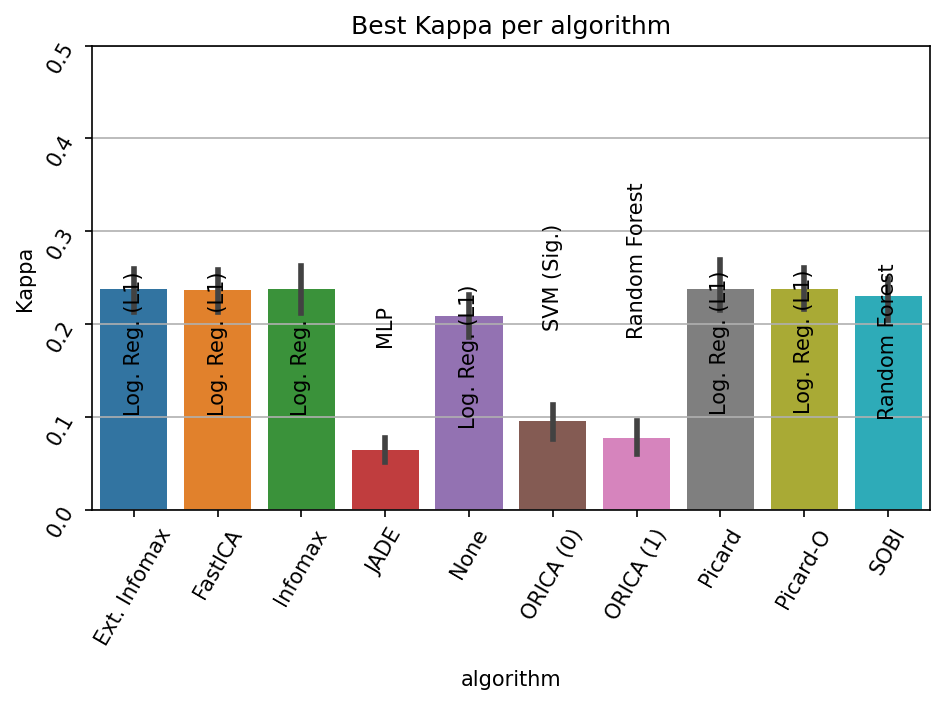

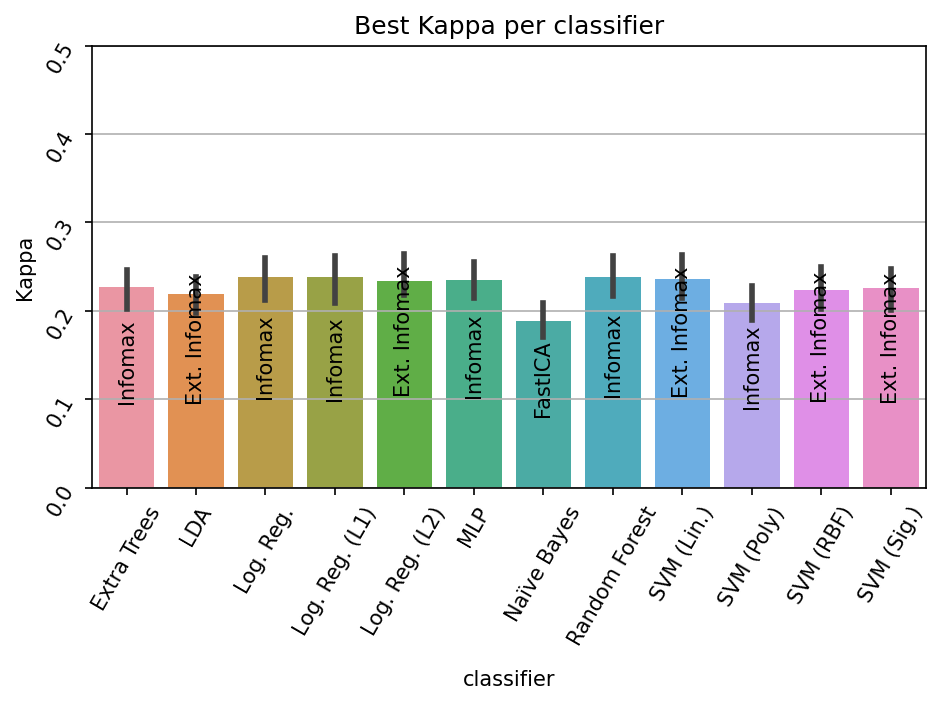

In [37]:

from ica_benchmark.visualization.multiple_runs import average_barplot, best_per_group_barplot


best_per_group_barplot(
    full_df,
    grouping_cols=["classifier"],
    x_col="algorithm",
    val_col="Kappa",
    figsize=None,
    x_label=None,
    save_filepath=None,
    ylim=(0, .5),
    title=None,
)

best_per_group_barplot(
    full_df,
    grouping_cols=["algorithm"],
    x_col="classifier",
    val_col="Kappa",
    figsize=None,
    x_label=None,
    save_filepath=None,
    ylim=(0, .5),
    title=None,
)

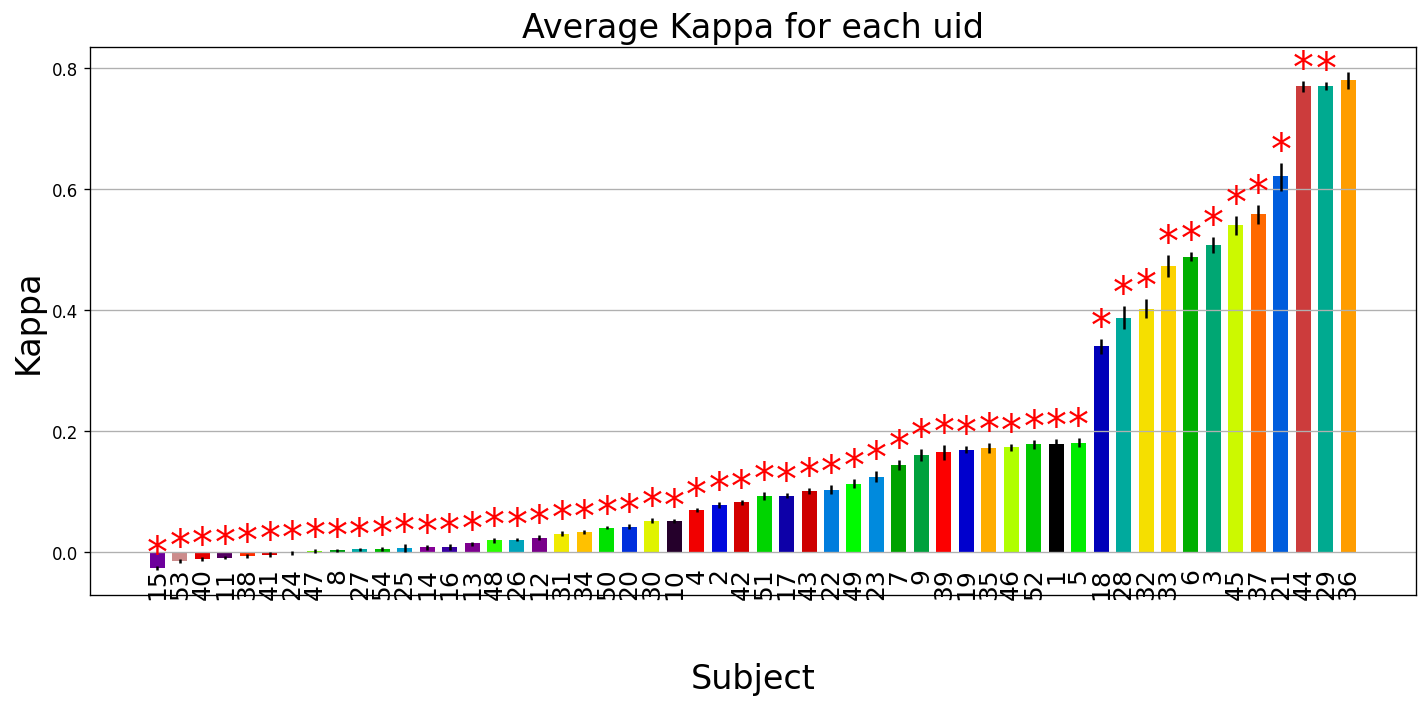

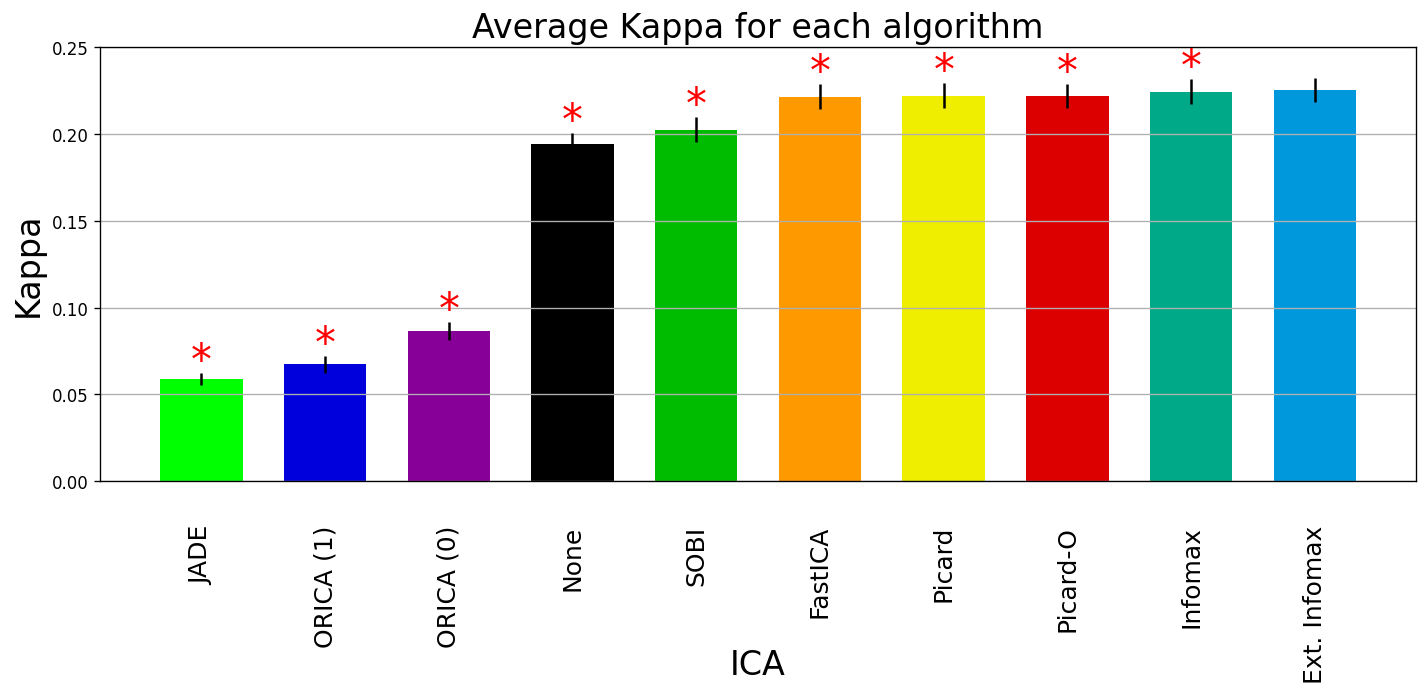

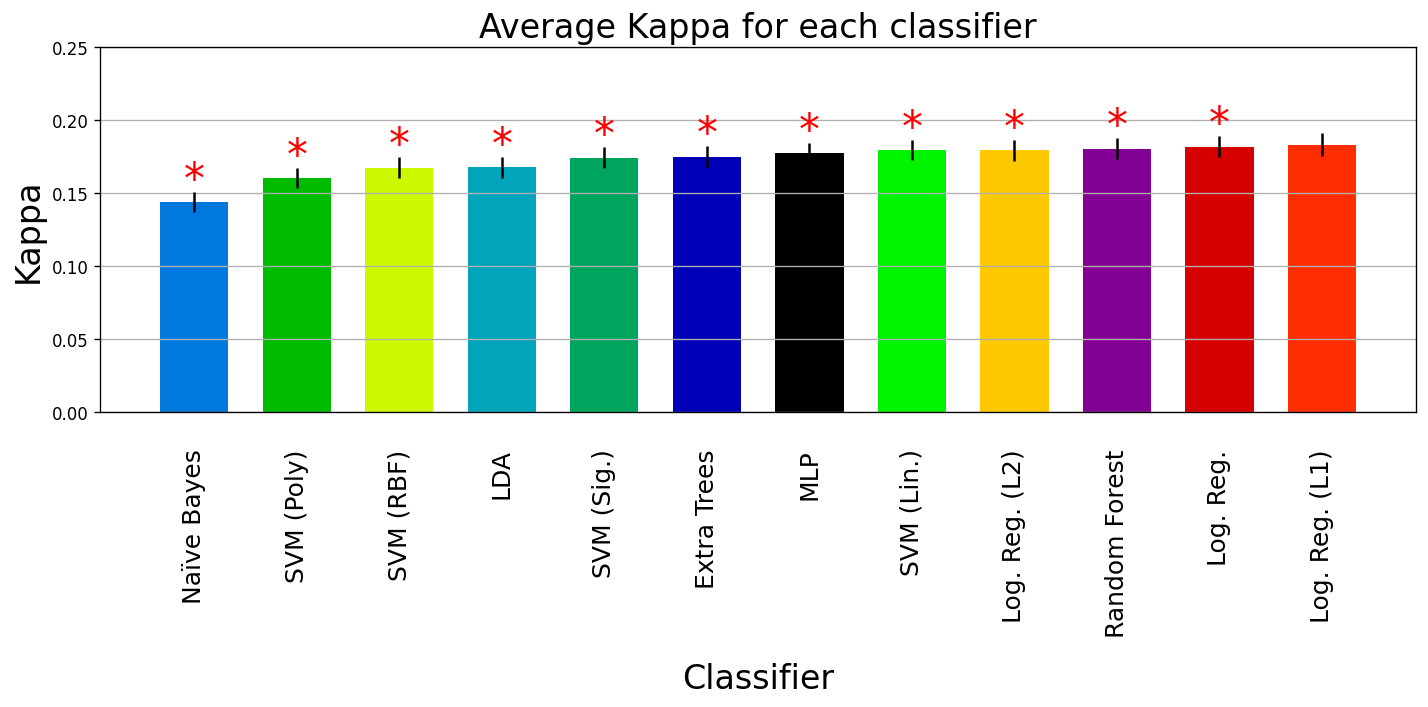

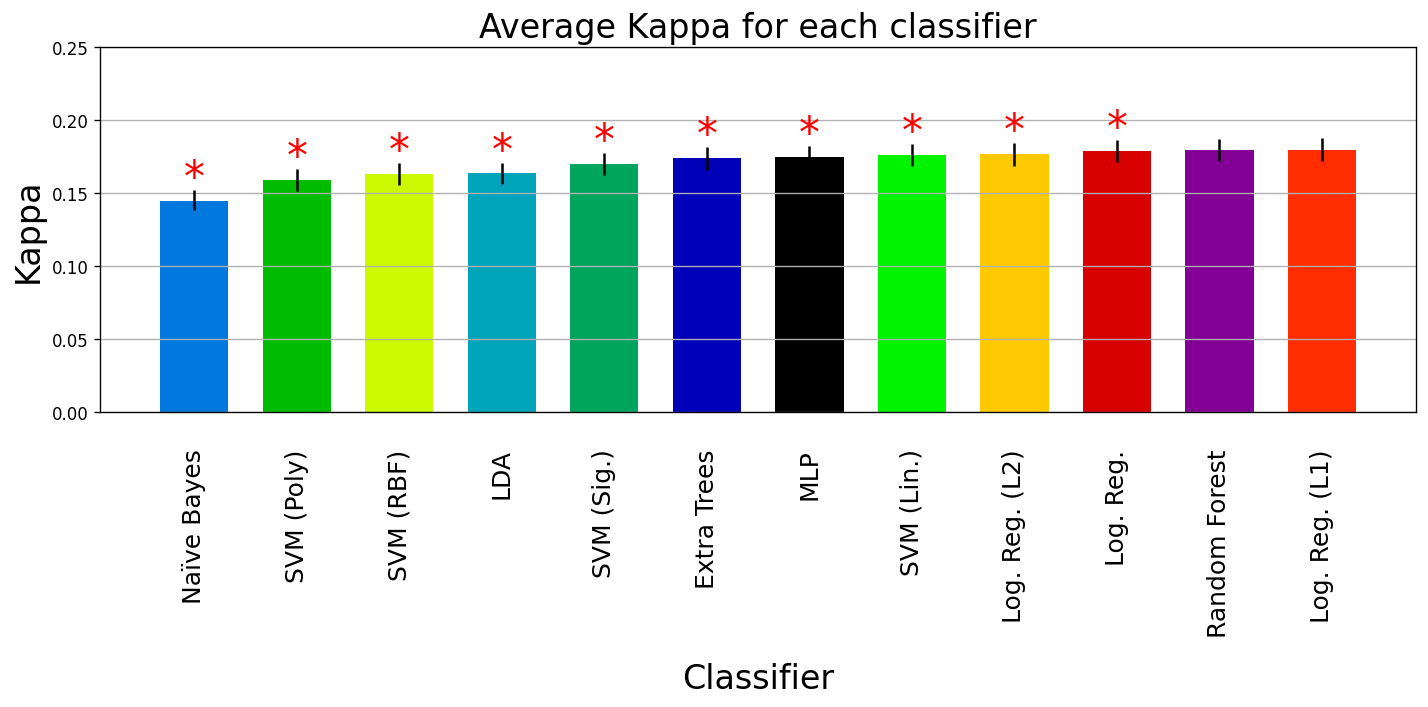

In [38]:
results_df = full_df

kwargs = dict(
    n_boots=1000,
    figsize=(12, 6),
    legend_in=None
)
average_barplot(
    results_df,
    x_col="uid",
    grouping_cols=["algorithm", "classifier"],
    val_col="Kappa",
    key_cols="run",
    x_label="Subject",
    labelpad=40,
    **kwargs
)

average_barplot(
    results_df,
    x_col="algorithm",
    grouping_cols=["uid", "classifier"],
    val_col="Kappa",
    key_cols="run",
    x_label="ICA",
    labelpad=100,
    ylim=(0, 0.25),
    **kwargs
)

average_barplot(
    results_df,
    x_col="classifier",
    grouping_cols=["uid", "algorithm"],
    val_col="Kappa",
    key_cols="run",
    x_label="Classifier",
    labelpad=150,
    ylim=(0, 0.25),
    **kwargs
)

average_barplot(
    results_df.query("algorithm != 'None'"),
    x_col="classifier",
    grouping_cols=["uid", "algorithm"],
    val_col="Kappa",
    key_cols="run",
    x_label="Classifier",
    labelpad=150,
    ylim=(0, 0.25),
    **kwargs
)


In [39]:
from statsmodels.regression.mixed_linear_model import VCSpec
import statsmodels.api as sm
df = full_df
vc = {"g1": "0 + C(classifier)", "g2": "0 + C(algorithm)", "g4": "0 + C(uid)"}
oo = np.ones(df.shape[0])
model3 = sm.MixedLM.from_formula("Kappa ~ 1", groups=oo, vc_formula=vc, data=df)
result = model3.fit()
print(result.summary())
np.sqrt(result.scale * result.params)

/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Kappa     
No. Observations: 64800   Method:             REML      
No. Groups:       1       Scale:              0.0186    
Min. group size:  64800   Log-Likelihood:     36797.5111
Max. group size:  64800   Converged:          Yes       
Mean group size:  64800.0                               
---------------------------------------------------------
            Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept   0.172     0.038  4.520  0.000   0.098   0.247
g1 Var      0.000     0.000                              
g2 Var      0.005     0.018                              
g4 Var      0.051     0.072                              



Intercept    0.056696
g1 Var       0.011005
g2 Var       0.071145
g4 Var       0.225044
dtype: float64

In [40]:
from statsmodels.regression.mixed_linear_model import VCSpec
import statsmodels.api as sm
df = full_df
vc = {"g2": "0 + C(algorithm) * C(classifier)"}
oo = np.ones(df.shape[0])
model3 = sm.MixedLM.from_formula("Kappa ~ 1", groups=oo, vc_formula=vc, data=df)
result = model3.fit()
print(result.summary())
np.sqrt(result.scale * result.params)

/home/paulo/miniconda3/envs/bci/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Kappa     
No. Observations: 64800   Method:             REML      
No. Groups:       1       Scale:              0.0683    
Min. group size:  64800   Log-Likelihood:     -5123.5779
Max. group size:  64800   Converged:          Yes       
Mean group size:  64800.0                               
---------------------------------------------------------
           Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept  0.174     0.008  21.760  0.000   0.159   0.190
g2 Var     0.001     0.000                               



Intercept    0.109133
g2 Var       0.023210
dtype: float64

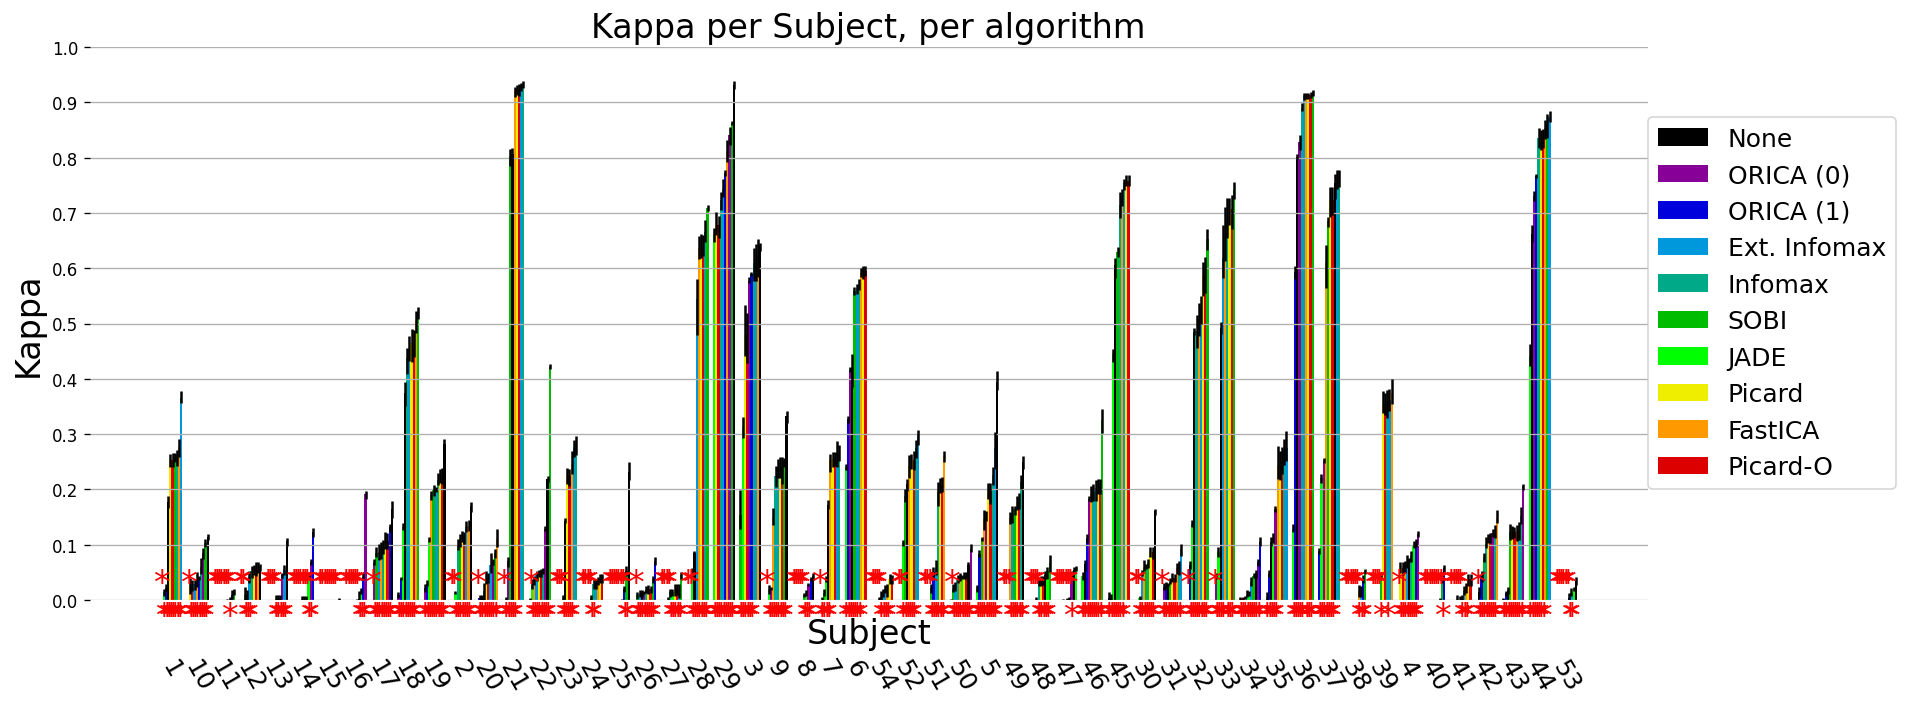

In [42]:
from ica_benchmark.visualization.multiple_runs import detailed_barplot

detailed_barplot(
    full_df,
    x_col='uid',
    hue_col='algorithm',
    val_col="Kappa",
    key_cols=['run', "classifier"],
    save_filepath=None,
    w=5,
    cmap='nipy_spectral',
    x_label="Subject",
    y_label="Kappa",
#     title="Number of epochs per ICA method, per subject",
#     ylim=(0, 1200),
#     ast_loc=(-30, 10),
#     labelpad=30,
#     tick_pad=-40
)